<a href="https://colab.research.google.com/github/Devansh30032004/Higgs_Boson_Detector/blob/main/Higgs_boson_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: random_submission.zip   
  inflating: test.zip                
  inflating: training.zip            


In [2]:
# prompt: unzip training.zip and test.zip and extract the training and test .csv files from them respectively

!unzip training.zip
!unzip test.zip


Archive:  training.zip
  inflating: training.csv            
Archive:  test.zip
  inflating: test.csv                


In [3]:
!pip install --upgrade pandas
import pandas as pd
import numpy as np

# Load data
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

# Columns: DER_mass_MMC (invariant mass), PRI_jet_leading_pt, etc.
# Target: "Label" (s = signal, b = background)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [4]:
train['Label'].replace({'s': 1, 'b': 0}, inplace=True)

<ipython-input-4-ba2acb30ff77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Label'].replace({'s': 1, 'b': 0}, inplace=True)
<ipython-input-4-ba2acb30ff77>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Label'].replace({'s': 1, 'b': 0}, inplace=True)


In [5]:
train.sample(3)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
177003,277003,128.478,60.268,60.578,158.699,6.141,1873.743,-9.198,1.526,0.849,...,2,155.872,2.590,-0.868,48.458,-3.551,0.792,204.330,0.001503,1
57950,157950,151.924,115.154,74.705,45.959,2.016,162.570,-0.912,2.524,58.312,...,3,57.955,1.331,-0.970,52.089,-0.685,-3.081,171.469,2.194587,0
30314,130314,95.348,26.816,73.737,137.677,2.619,208.368,-1.608,1.166,4.950,...,2,99.738,1.637,0.416,35.891,-0.982,0.829,135.628,1.454848,0


In [6]:
def print_unique_col_values(df):
    """
    Prints the unique values for each column in a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame.
    """
    for column in df.columns:
        print(f"Unique values for '{column}': {df[column].unique()}")

print_unique_col_values(train)

Unique values for 'EventId': [100000 100001 100002 ... 349997 349998 349999]
Unique values for 'DER_mass_MMC': [ 138.47   160.937 -999.    ...   80.388  164.31   217.02 ]
Unique values for 'DER_mass_transverse_met_lep': [ 51.655  68.768 162.172 ...  29.023  77.54   19.362]
Unique values for 'DER_mass_vis': [ 97.827 103.235 125.953 ... 115.781 749.97   75.839]
Unique values for 'DER_pt_h': [ 27.98   48.146  35.635 ... 152.684 127.508 127.953]
Unique values for 'DER_deltaeta_jet_jet': [ 9.100e-01 -9.990e+02  2.636e+00 ...  7.543e+00  6.801e+00  7.316e+00]
Unique values for 'DER_mass_jet_jet': [ 124.711 -999.     284.584 ...  216.006  322.296  119.437]
Unique values for 'DER_prodeta_jet_jet': [ 2.666e+00 -9.990e+02 -5.400e-01 ...  5.530e+00  9.357e+00 -8.745e+00]
Unique values for 'DER_deltar_tau_lep': [3.064 3.473 3.148 ... 4.692 4.717 4.846]
Unique values for 'DER_pt_tot': [41.928  2.078  9.336 ... 39.628 38.975 48.742]
Unique values for 'DER_sum_pt': [197.76  125.157 197.814 ... 610.48

In [7]:
test.sample(5)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
371069,721069,105.922,61.941,82.607,25.377,-999.000,-999.000,-999.000,2.751,47.170,...,-0.559,207.965,1,36.947,-1.387,-2.844,-999.000,-999.000,-999.000,36.947
415647,765647,211.451,85.500,166.254,14.393,0.975,109.566,-0.186,4.152,25.144,...,-3.053,343.370,2,55.562,-0.260,1.433,46.765,0.715,-2.423,102.327
52122,402122,72.351,9.905,33.264,115.195,-999.000,-999.000,-999.000,1.408,42.699,...,0.096,227.896,1,148.145,-0.148,-3.116,-999.000,-999.000,-999.000,148.145
95098,445098,109.949,76.136,73.842,57.628,-999.000,-999.000,-999.000,2.940,11.123,...,0.598,209.833,1,49.926,1.849,-2.683,-999.000,-999.000,-999.000,49.926
115918,465918,121.045,4.306,80.786,1.148,-999.000,-999.000,-999.000,3.068,1.148,...,-0.981,123.412,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000


In [8]:
train.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767,0.342668
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103,0.474603
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188,0.000000
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128,1.000000
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543,1.000000


In [9]:
train = train.drop(["EventId", "Weight"], axis=1)

In [10]:
train.sample(5)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
241160,107.325,3.513,80.815,42.866,-999.000,-999.000,-999.000,2.609,42.866,74.660,...,217.789,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1
82785,107.277,54.965,80.853,57.346,-999.000,-999.000,-999.000,2.394,2.548,143.049,...,127.966,1,57.026,1.713,0.766,-999.000,-999.000,-999.000,57.026,1
49368,99.822,37.457,53.247,145.972,-999.000,-999.000,-999.000,1.432,1.980,227.226,...,252.663,1,146.256,-0.146,0.241,-999.000,-999.000,-999.000,146.256,0
12971,102.177,12.958,65.418,197.357,4.935,1208.736,-5.254,1.183,0.916,361.948,...,286.185,2,172.201,1.554,-2.622,61.201,-3.382,-1.326,233.402,1
187280,102.085,31.900,44.470,188.937,0.850,121.597,-0.178,1.203,1.459,286.809,...,338.466,2,176.387,-0.477,-2.227,35.873,0.373,-0.894,212.261,0


In [11]:
train.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,0.342668
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,0.474603
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,0.000000
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,1.000000
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,1.000000


In [12]:
train.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Label'],
      dtype='object')

In [13]:
# prompt: statement to view each column's data type

train.dtypes


,0
DER_mass_MMC,float64
DER_mass_transverse_met_lep,float64
DER_mass_vis,float64
DER_pt_h,float64
DER_deltaeta_jet_jet,float64
DER_mass_jet_jet,float64
DER_prodeta_jet_jet,float64
DER_deltar_tau_lep,float64
DER_pt_tot,float64
DER_sum_pt,float64


In [14]:
y_train = train['Label']
X_train = train.drop('Label', axis=1)

In [15]:
# Convert -999 to NaN in all columns
X_train.replace(-999, np.nan, inplace=True)


In [16]:
X_train.sample(5)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
44482,125.111,5.099,53.102,208.166,0.238,45.630,6.414,1.190,80.004,363.997,...,-2.928,406.616,3,95.692,2.417,0.565,90.050,2.654,0.942,269.700
185829,NaN,104.239,73.584,26.600,NaN,NaN,NaN,2.324,4.913,107.825,...,1.216,155.896,1,30.390,-3.102,-1.959,NaN,NaN,NaN,30.390
228663,99.244,35.000,73.904,52.484,NaN,NaN,NaN,2.591,23.831,128.815,...,-0.407,136.996,1,47.375,0.026,-2.065,NaN,NaN,NaN,47.375
224821,116.115,80.254,93.647,5.229,NaN,NaN,NaN,2.583,5.229,99.777,...,-1.748,140.843,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
124206,111.547,18.721,56.679,67.200,0.362,24.699,0.398,2.519,9.007,136.823,...,-1.934,213.094,2,38.794,0.838,1.230,38.315,0.476,1.600,77.110


In [17]:
train.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,0.342668
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,0.474603
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,0.000000
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,1.000000
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,1.000000


In [18]:
# prompt: find % of values in each column of X_train which are NaN

# Calculate the percentage of NaN values in each column of X_train
nan_percentage = (X_train.isnull().sum() / len(X_train)) * 100

# Print the results
nan_percentage


,0
DER_mass_MMC,15.2456
DER_mass_transverse_met_lep,0.0000
DER_mass_vis,0.0000
DER_pt_h,0.0000
DER_deltaeta_jet_jet,70.9828
DER_mass_jet_jet,70.9828
DER_prodeta_jet_jet,70.9828
DER_deltar_tau_lep,0.0000
DER_pt_tot,0.0000
DER_sum_pt,0.0000


In [19]:
# prompt: in whatever columns the % values of NaN is greater than 50% remove those from X_train

# Identify columns with more than 50% NaN values
columns_to_drop = nan_percentage[nan_percentage > 50].index

# Drop those columns from X_train
X_train = X_train.drop(columns_to_drop, axis=1)


In [20]:
X_train.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt'],
      dtype='object')

In [21]:
X_train = X_train.drop(["PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi"], axis=1)

In [22]:
X_train.sample(5)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
98081,NaN,125.450,81.492,182.042,1.655,59.571,388.998,4.560,-0.055,21.848,1.657,3.087,99.621,0.245,-2.333,119.802,-1.110,472.247,3,267.529
206968,121.878,0.062,66.671,202.405,1.376,31.198,322.071,1.799,1.001,37.417,1.072,0.870,67.299,0.357,-0.306,117.721,-0.305,364.043,3,217.355
103883,NaN,88.802,53.308,11.065,1.284,11.065,93.310,0.503,-1.398,62.065,2.356,0.348,31.245,2.007,-0.887,72.147,2.978,164.053,0,0.000
168788,NaN,90.025,148.082,14.968,3.742,14.968,69.687,1.845,-1.319,24.498,1.391,-1.477,45.188,-1.518,2.452,46.937,-0.263,74.739,0,-0.000
38078,100.619,80.342,46.528,61.631,2.418,21.085,97.892,1.366,0.651,20.884,0.301,-1.465,28.524,0.726,0.915,61.708,-1.641,147.048,1,48.483


In [23]:
# prompt: in whatever columns of X_train NaN is there replace it with median of that column

# Fill NaN values with the median of each column
for col in X_train.columns:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)


<ipython-input-23-5e2081473c6f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)


In [24]:
# prompt: find % of values in each column of X_train which are NaN

# Calculate the percentage of NaN values in each column of X_train
nan_percentage = (X_train.isnull().sum() / len(X_train)) * 100

# Print the results
nan_percentage


,0
DER_mass_MMC,0.0
DER_mass_transverse_met_lep,0.0
DER_mass_vis,0.0
DER_pt_h,0.0
DER_deltar_tau_lep,0.0
DER_pt_tot,0.0
DER_sum_pt,0.0
DER_pt_ratio_lep_tau,0.0
DER_met_phi_centrality,0.0
PRI_tau_pt,0.0


In [25]:
X_train.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,120.417434,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,73.064591
std,52.859218,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,0.000000
25%,95.665000,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1633.433000


In [26]:
# prompt: normalize all columns of X_train using Z-scaler

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)


In [27]:
X_train_scaled[0]

array([ 0.34152231,  0.06833197,  0.40768027, -0.46996624,  0.88247762,
        1.03309853,  0.33989441,  0.17092875,  1.27708372, -0.2708107 ,
        0.84671212,  0.21421167,  0.22505416,  1.81228807, -1.35281991,
       -0.75675685, -0.14726741,  0.38684673,  1.04440205,  0.4125105 ])

In [28]:
# prompt: split X_train into training and test data

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_trainf, y_testf = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)
len(x_train), len(x_test)

(200000, 50000)

In [29]:
x_train1 = x_train/ x_train.max()
x_test1 = x_test/ x_test.max()

In [30]:
# prompt: convert y_trainf & y_testf into numpy arrays

y_trainf = np.array(y_trainf)
y_testf = np.array(y_testf)


In [77]:
# prompt: use XG boost on x_train & test accuracy on x_test
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7],
    'learning_rate': [0.1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [200]
}
# Create an XGBoost classifier
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# Train the model
grid_search.fit(x_train, y_trainf)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Best score:  0.83291


In [78]:
# prompt: train xgb on x_train and test accuracy on x_test

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(x_test, y_testf)
print(f"Accuracy on the test set: {accuracy}")


Accuracy on the test set: 0.83136


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42) # You can add hyperparameters here

# Train the model
rf_classifier.fit(x_train, y_trainf)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the model (example: accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_testf, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy}")


Accuracy of Random Forest Classifier: 0.83162


In [76]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the RandomForestClassifier
rf_classifier1 = RandomForestClassifier(random_state=42,n_estimators =200, max_features ='sqrt', max_depth=20, min_samples_split=2, min_samples_leaf=2, bootstrap=True) # You can add hyperparameters here
# Train the model
rf_classifier1.fit(x_train, y_trainf)

# Make predictions on the test set
y_pred = rf_classifier1.predict(x_test)

# Evaluate the model (example: accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_testf, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy}")

Accuracy of Random Forest Classifier: 0.83246


In [32]:
# prompt: generate a deep learning model with 3 layers of 32, 64 and 1 neuron and fit the data and test against test dataset
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Define the model
model = keras.Sequential([
    Dense(128, activation='elu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss= keras.losses.BinaryCrossentropy(),  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

model.summary()

# Train the model
model.fit(x_train, y_trainf, epochs=15, batch_size=32, validation_data = (x_test, y_testf)) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_testf)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.8069 - loss: 0.4174 - val_accuracy: 0.8238 - val_loss: 0.3829
Epoch 2/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8281 - loss: 0.3797 - val_accuracy: 0.8290 - val_loss: 0.3742
Epoch 3/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8289 - loss: 0.3768 - val_accuracy: 0.8250 - val_loss: 0.3803
Epoch 4/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8323 - loss: 0.3743 - val_accuracy: 0.8314 - val_loss: 0.3717
Epoch 5/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8302 - loss: 0.3745 - val_accuracy: 0.8304 - val_loss: 0.3699
Epoch 6/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8322 - loss: 0.3729 - val_accuracy: 0.8297 - val_loss: 0.3742
Epoch 7/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8336 - loss: 0.3694 - val_accuracy: 0.8301 - val_loss: 0.3718
Epoch 8/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8339 - loss: 0

In [33]:
model1 = keras.Sequential([
    Dense(128, activation='elu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(2, activation='softmax')  # Output layer with sigmoid for binary classification
])

# Compile the model
model1.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(),  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

model1.summary()

# Train the model
model1.fit(x_train, y_trainf, epochs=15, batch_size=32, validation_data = (x_test, y_testf)) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model1.evaluate(x_test, y_testf)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,090 (51.13 KB)

 Trainable params: 13,090 (51.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.8102 - loss: 0.4137 - val_accuracy: 0.8266 - val_loss: 0.3798
Epoch 2/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8269 - loss: 0.3815 - val_accuracy: 0.8285 - val_loss: 0.3780
Epoch 3/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8299 - loss: 0.3787 - val_accuracy: 0.8299 - val_loss: 0.3745
Epoch 4/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8298 - loss: 0.3760 - val_accuracy: 0.8307 - val_loss: 0.3752
Epoch 5/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8312 - loss: 0.3755 - val_accuracy: 0.8306 - val_loss: 0.3723
Epoch 6/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8311 - loss: 0.3751 - val_accuracy: 0.8309 - val_loss: 0.3710
Epoch 7/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8321 - loss: 0.3724 - val_accuracy: 0.8313 - val_loss: 0.3697
Epoch 8/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8329 - loss: 0

In [42]:
# prompt: generate a deep learning model with 3 layers of 32, 64 and 1 neuron and fit the data and test against test dataset

# Define the model
model = keras.Sequential([
    Dense(256, activation='elu', input_shape=(x_train.shape[1],)),
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(16, activation='elu'),
    Dense(8, activation='elu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss= keras.losses.BinaryCrossentropy(),  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

model.summary()

# Train the model
model.fit(x_train, y_trainf, epochs=100, batch_size=32, validation_data = (x_test, y_testf)) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_testf)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,281 (192.50 KB)

 Trainable params: 49,281 (192.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8085 - loss: 0.4170 - val_accuracy: 0.8265 - val_loss: 0.3820
Epoch 2/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8268 - loss: 0.3840 - val_accuracy: 0.8261 - val_loss: 0.3787
Epoch 3/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8288 - loss: 0.3812 - val_accuracy: 0.8230 - val_loss: 0.3843
Epoch 4/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8299 - loss: 0.3766 - val_accuracy: 0.8290 - val_loss: 0.3794
Epoch 5/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8309 - loss: 0.3760 - val_accuracy: 0.8314 - val_loss: 0.3719
Epoch 6/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8325 - loss: 0.3721 - val_accuracy: 0.8326 - val_loss: 0.3719
Epoch 7/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8331 - loss: 0.3701 - val_accuracy: 0.8314 - val_loss: 0.3722
Epoch 8/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8351 -

In [56]:
test = pd.read_csv("test.csv")
test.sample(5)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
295443,645443,158.737,124.763,80.788,3.872,-999.000,-999.000,-999.000,2.782,3.872,...,2.798,167.897,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
42463,392463,103.957,0.356,52.308,72.862,4.267,315.356,-4.495,2.666,0.393,...,-2.280,120.759,2,46.675,-1.895,0.755,30.481,2.372,1.472,77.156
227721,577721,110.413,49.271,80.153,86.116,0.051,75.915,0.971,1.782,26.302,...,-0.865,259.647,2,67.076,-1.011,3.057,34.166,-0.960,1.283,101.242
103076,453076,49.000,51.735,40.670,27.827,-999.000,-999.000,-999.000,1.589,27.827,...,0.645,84.227,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
48258,398258,94.913,48.949,71.098,41.862,0.480,81.820,4.633,2.085,0.800,...,0.558,300.312,2,56.735,-2.406,-0.335,31.042,-1.926,-2.693,87.777


In [57]:
test.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [58]:
test1 = test.drop(["PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi"], axis=1)

In [59]:
test1 = test1.filter(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt'], axis=1)

In [60]:
test1.sample(4
          )

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
333311,150.573,71.366,118.434,44.514,2.957,24.406,157.255,2.047,-1.411,34.090,1.379,1.541,69.791,0.018,-1.085,36.350,-2.659,238.609,1,53.374
69352,67.705,56.177,49.186,22.427,2.986,28.414,92.387,1.370,-1.408,20.793,0.185,-0.134,28.483,-0.144,2.834,30.880,-0.961,102.038,1,43.111
423118,96.396,28.584,68.130,41.133,2.425,41.133,71.468,1.032,1.413,35.175,2.263,1.333,36.293,1.850,-1.057,15.006,0.262,125.907,0,-0.000
437723,160.469,131.283,131.610,32.421,2.441,16.978,199.091,2.259,-1.334,46.096,1.537,0.300,104.151,1.212,2.719,43.639,-0.882,362.411,1,48.843


In [61]:
test1.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt'],
      dtype='object')

In [62]:
test1.replace(-999, np.nan, inplace=True)

In [63]:
nan_percentage = (test1.isnull().sum() / len(test1)) * 100

# Print the results
nan_percentage


,0
DER_mass_MMC,15.240364
DER_mass_transverse_met_lep,0.000000
DER_mass_vis,0.000000
DER_pt_h,0.000000
DER_deltar_tau_lep,0.000000
DER_pt_tot,0.000000
DER_sum_pt,0.000000
DER_pt_ratio_lep_tau,0.000000
DER_met_phi_centrality,0.000000
PRI_tau_pt,0.000000


In [64]:
for col in test1.columns:
    if test1[col].isnull().any():
        median_val = test1[col].median()
        test1[col].fillna(median_val, inplace=True)

<ipython-input-64-9c1d2dd4dab2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test1[col].fillna(median_val, inplace=True)


In [65]:
nan_percentage = (test1.isnull().sum() / len(test1)) * 100

# Print the results
nan_percentage


,0
DER_mass_MMC,0.0
DER_mass_transverse_met_lep,0.0
DER_mass_vis,0.0
DER_pt_h,0.0
DER_deltar_tau_lep,0.0
DER_pt_tot,0.0
DER_sum_pt,0.0
DER_pt_ratio_lep_tau,0.0
DER_met_phi_centrality,0.0
PRI_tau_pt,0.0


In [66]:
# Initialize the StandardScaler
scaler1 = StandardScaler()

# Fit and transform the data
test_scaled = scaler1.fit_transform(test1)

In [67]:
test_scaled[0]

array([-0.15079305,  0.8561065 , -1.41479323, -0.86566144, -1.88625185,
       -0.7328532 , -0.88303485,  0.11429887, -1.06911319, -0.74075198,
       -0.4352758 , -0.32663992, -0.57652091, -0.38383159, -0.8614946 ,
        0.21289685,  1.11994828, -0.8776119 , -1.00091961, -0.7438921 ])

In [46]:
print(model.summary())
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,173 (153.02 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,116 (102.02 KB)

None


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,272 (153.41 KB)

 Trainable params: 13,090 (51.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,182 (102.28 KB)

In [68]:
pred1 = model.predict(test_scaled)
pred2 = model1.predict(test_scaled)

17188/17188 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step


In [69]:
preda = ['s' if p >= 0.5 else 'b' for p in pred1]  # Iterate through pred1 and assign 's' or 'b' based on individual values

In [70]:
preda[:10]

['b', 'b', 'b', 's', 'b', 'b', 'b', 'b', 'b', 's']

In [71]:
predb = ['s' if p >= 0.5 else 'b' for p in pred2[:,1]]

In [72]:
predb[:10]

['b', 'b', 's', 's', 'b', 'b', 'b', 'b', 'b', 's']

In [79]:
pred3 = rf_classifier1.predict(test_scaled)
pred4 = best_model.predict(test_scaled)

In [82]:
predc = ['s' if p==1 else 'b' for p in pred3]
predd = ['s' if p==1 else 'b' for p in pred4]

In [98]:
# prompt: make a csv file with 3 columns for EventId, RankOrder and predicted class for each test row

import pandas as pd

# Assuming 'test' DataFrame and 'preda' list from the previous code
# Create a DataFrame with EventId, RankOrder, and predicted class
results_df = pd.DataFrame({
    'EventId': test['EventId'],
    'RankOrder': range(1, len(test) + 1),  # Assuming RankOrder starts from 1
    'Class': predf
})

# Save the DataFrame to a CSV file
results_df.to_csv('predictions5.csv', index=False)


In [85]:
# prompt: train an SVM on x_train & check accuracy on x_test

from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42) # You can adjust kernel and other hyperparameters

# Train the SVM model
svm_classifier.fit(x_train, y_trainf)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_testf, y_pred_svm)
print(f"Accuracy of SVM Classifier: {accuracy_svm}")


Accuracy of SVM Classifier: 0.82994


In [86]:
pred5 = svm_classifier.predict(test_scaled)
prede = ['s' if p==1 else 'b' for p in pred5]

In [93]:
pred1[:10]

array([[0.00114686],
       [0.03705235],
       [0.39098972],
       [0.907555  ],
       [0.00590713],
       [0.023064  ],
       [0.0367875 ],
       [0.01305143],
       [0.01729756],
       [0.7989715 ]], dtype=float32)

In [94]:
pred6 = np.zeros(len(test))
m = len(test)
for i in range(m):
  if(preda[i] == prede[i]):
    pred6[i] = pred5[i]
  else:
    if(pred1[i] >= 0.75):
      pred6[i]=1
    elif(pred1[i] <= 0.25):
      pred6[i]=0
    else:
      pred6[i] = pred5[i]


In [96]:
predf = ['s' if p==1 else 'b' for p in pred6]

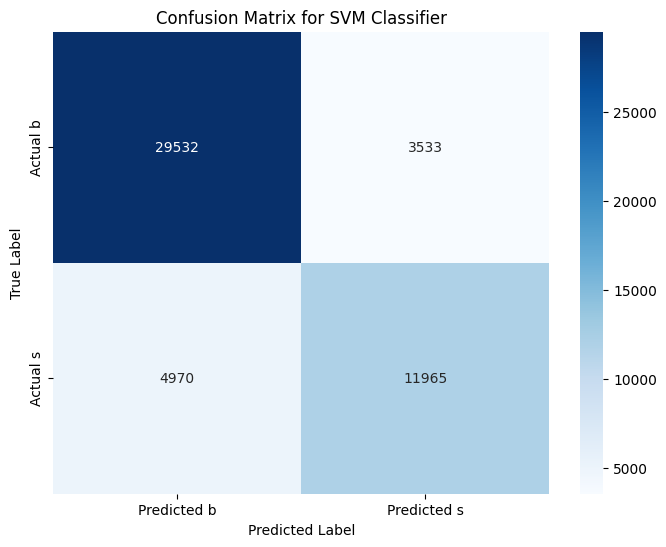

In [99]:
# prompt: print colorful confusion matrix for model & svm_classifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_testf and y_pred_svm are defined from your previous code
cm = confusion_matrix(y_testf, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted b', 'Predicted s'],
            yticklabels=['Actual b', 'Actual s'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()
